<div style="text-align:center; font-size:36px; font-weight:bold; color:#2874A6; text-shadow: 1px 1px 2px #000;">
    Car Price Prediction Project
</div>

## **PHASE 5 PROJECT: GROUP 5**

### **Team Members:**
- **Kelvin Mwaura**  
- **Marion Achieng**  
- **Gerald Mwangi**  
- **Jackson Munene**
- **Benedict Kuloba**

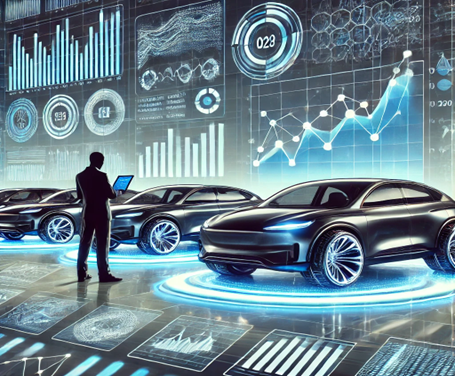

*Figure 1: A visual depiction of predictive analytics integrated with modern automotive sales.*

## Business Understanding
---

#### Overview 

The used car market in Kenya has undergone significant changes since the country's independence. In the early post-independence years of the 1960s through the 1980s, Kenya's automotive landscape was dominated by new vehices however, in the 1990s  the marked had a turning point as economic liberalization policies relaxed car importation restrictions, opening the door to an increasing number of used car imports, primarily from Japan. This trend accelerated into the 2000s, with used cars becoming increasingly popular due to their affordability compared to new vehicles. Due to these relaxed policies used cars have become quite popular and affordable making up the majority of vehicle sales in Kenya, with about 80% of all vehicles sold being pre-owned these is due to increase in their demand among may car buyers due to there affordability The market used  is made up of  foreign or locally used vehicle

Navigating this market can be challenging, as both buyers and sellers often face the difficulty of determining fair prices due to various influencing factors such as age, mileage, and condition of the vehicles. Accurate price estimation is crucial for making informed decisions in this dynamic market.These project aims to offer car buyers and sellers an efficient,reliable and accurate solution in pricing of different vehicle models based on their various features by leveraging data driven insights analysis and machine learning tools and techinques
  
This project focuses on creating a machine learning model tailored specifically to the **Kenyan market**, aiming to predict the value of used cars based on various features.

---

#### Problem Statement

The Kenyan used car market lacks a reliable, data-driven mechanism for accurately predicting vehicle prices. This absence leads to inefficiencies and uncertainties for buyers, sellers, and other stakeholders in the automotive sector. Currently, pricing is often based on subjective assessments or incomplete information, resulting in potential overpricing or undervaluing of vehicles hence these situation often leads to prolonged negotiation processes, unfair deals, and a lack of trust in the market.


---

#### Objectives

**Main Objective**

1. To develop a machine learning model that predicts prices of used cars accurately in kenya based on the vehicle various  features

**Specific Objectives**

2. To determine which vehicle features that have the greatest impact on the price of the vehicle 

3. To  determine which car brands is populars in the kenya used car market

4. To determine vehicle features are the most common in our dataset 

---

#### Success criteria

A **R squared of 0.8** which shows the model has predicted 80% of the variance on the target variable

A **Low mean absolute error**suggesting  the model has the  small average absolute difference between predicted and actual values.

---

#### Constraints

Lack of enough kenya data to adequalitly train our models

---






## Data Understanding

The dataset for this project was sourced from several **Kenyan car bazars and show rooms in Nairobi County and its environments**.This dataset contains car listings upto **2021**, capturing key information such as the car’s **Vehicle_name**, **year of manufacture**, **mileage**, **fuel type**, **transmission**, and the listed price. This data forms the foundation for building the predictive model and offers valuable insights into the Kenyan used car market.

#### Dataset Overview:

With a substantial size of 6,019 entries, this dataset offers valuable insights for our analysis. It encompasses a range of features pertinent to the Kenyan automotive market. Below is a description of the dataset's columns:

- **Total Rows:** 6,019
- **Total Columns:** 11

#### Column Details:

| **Column Name**       | **Description**                                              | **Data Type**    |
|------------------------|--------------------------------------------------------------|------------------|
| **No**                 | Unique identifier for each vehicle listing.                | Integer (int64)  |
| **Name**               | Model name of the vehicle.                                 | String (object)  |
| **Year**               | Year the vehicle was manufactured.                          | Integer (int64)  |
| **Kilometers_Driven**  | Total distance covered by the vehicle in kilometers.        | Integer (int64)  |
| **Fuel_Type**          | Type of fuel used by the vehicle (e.g., petrol, diesel).    | String (object)  |
| **Transmission**       | Transmission type of the vehicle (e.g., manual, automatic). | String (object)  |
| **Use**                | where the ehicle was previously used (e.g foreign,local)   | String (object)  |
| **Engine**             | Engine capacity or specification of the vehicle.           | String (object)  |
| **Power**              | Power output of the vehicle’s engine, typically in brakehorsepower. | String (object)  |
| **Seats**              | Number of seats available in the vehicle.                  | Integer (int64)  |
| **Car_price**          | Price of the vehicle listed in Kenyan Shillings.            | Float (float64)  |

---

Lets load our dataset and explore  it more

In [1]:
# Importing necessary libraries

# Data manupulation
import pandas as pd 
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge ,Lasso,ElasticNet
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
import pickle


## Loading Data

In [2]:
# Class for loading our data as well as offering a summary of the info of our data
class DataLoader:
    def __init__(self, file):
        self.file = file
        self.data = None

    def load_data(self):
        try:
            self.data = pd.read_excel(self.file)
            return self.data
        except FileNotFoundError:
            print(f"File not found: {self.file}")
        except pd.errors.EmptyDataError:
            print("No data: File is empty")
        except ValueError:
            print("ValueError: Check the Excel file for potential issues")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

    def data_info(self, n=5):
        if self.data is not None:
            print(f"Shape: {self.data.shape}")
            print(f"Dataframe info:")
            self.data.info()
            print(f"Descriptive Statistics:\n{self.data.describe()}")
            print(f"Columns:\n{self.data.columns.tolist()}")
            print(f"Data Types for each column:\n{self.data.dtypes}")
            print(f"The first {n} rows:\n{self.data.head(n)}")
        else:
            print("Data is not loaded.")

# Calling an instance of the class

file = 'car_data.xlsx'
data_loader = DataLoader(file)
df = data_loader.load_data()



Next, we will get an overview of the dataset.

In [3]:
# Calling datainfo method
data_loader.data_info()

Shape: (6019, 11)
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Use                6019 non-null   object 
 7   Engine             5983 non-null   object 
 8   Power              5983 non-null   object 
 9   Seats              5977 non-null   float64
 10  Car_price          6019 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 517.4+ KB
Descriptive Statistics:
                No         Year  Kilometers_Driven        Seats     Car_price
count  6019.000000  6019.000000       6.019000e+03  5977.000000  6.01

From our stastics we can observe that the average car price is 1.583 milllion ,average number of seats is  5 seats,average kilometers driven is 58000 kilometers and average year of vehicle manufacturing is 2013

## Data Preparation

### 1: Data Cleaning

At these stage we will clean our data using the following steps

**. Completeness** - we will check for missing values , how they affect our data set and  handle them

**. Consistency** - we will check for duplicate values and handle them

**. Uniformity** - we will check for uniformity in column naming, column data types

**. Validity** - we will handle irrelevant columns and check for outliers 

In [4]:
class DataCleaner(DataLoader):
    def __init__(self, file):
        super().__init__(file)
    
    def unclean_data(self):
        print(f'df before cleaning:\n{df.isnull().sum()}')
        print(f'Duplicates: {df.duplicated().sum()}')

        return
    
    def clean_data(self):
        df = self.load_data()
        
        if df is not None:
            # Remove non-numeric characters and convert to float for 'Engine' and 'Power'
            df['Engine'] = df['Engine'].str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float)
            df['Power'] = df['Power'].str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float)

            # Fill missing values in 'Engine', 'Power', and 'Seats' with the median and mode
            df['Engine'] = df['Engine'].fillna(df['Engine'].median())
            df['Power'] = df['Power'].fillna(df['Power'].median())
            df['Seats'] = df['Seats'].fillna(df['Seats'].mode()[0])

            # Convert data types
            df['Year'] = df['Year'].astype(int)
            df['Kilometers_Driven'] = df['Kilometers_Driven'].astype(int)
            df['Seats'] = df['Seats'].astype(int)
            df['Car_price'] = df['Car_price'].astype(float)

           # Standardize text data
            df['Name'] = df['Name'].str.lower()
            df['Fuel_Type'] = df['Fuel_Type'].str.lower()
            df['Transmission'] = df['Transmission'].str.lower()
            df['Use'] = df['Use'].str.lower()

            df['Use'] = df['Use'].str.strip()
            df['Use'] = df['Use'].replace({'third': 'local', 'fourth & above': 'local'})

            df['Name'] = df['Name'].str.replace('maruti', 'suzuki')

            #Renaming name column
            df.rename(columns={'Name': 'Model'}, inplace=True)
            
            return df
        else:
            print("Data loading failed, cleaning process aborted.")
            return None
        
# Calling an instancce of a  the class        
data_cleaner = DataCleaner(file)

In [5]:
# Calling class methods
data_cleaner.unclean_data()
cleaned_df = data_cleaner.clean_data()

# Confirming our cleaning and previewing our cleaned_df
cleaned_df.info()

cleaned_df.head(10)



df before cleaning:
No                    0
Name                  0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Use                   0
Engine               36
Power                36
Seats                42
Car_price             0
dtype: int64
Duplicates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 6019 non-null   int64  
 1   Model              6019 non-null   object 
 2   Year               6019 non-null   int32  
 3   Kilometers_Driven  6019 non-null   int32  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Use                6019 non-null   object 
 7   Engine             6019 non-null   float64
 8   Power              6019 non-null   float64
 9   Seats              6019 non-null   int32  
 10  C

,No,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Use,Engine,Power,Seats,Car_price
0,0,suzuki wagon r lxi cng,2010,72000,cng,manual,foreign,998.0,58.16,5,292250.0
1,1,hyundai creta 1.6 crdi sx option,2015,41000,diesel,manual,foreign,1582.0,126.20,5,2087500.0
2,2,honda jazz v,2011,46000,petrol,manual,foreign,1199.0,88.70,5,751500.0
3,3,suzuki ertiga vdi,2012,87000,diesel,manual,foreign,1248.0,88.76,7,1002000.0
4,4,audi a4 new 2.0 tdi multitronic,2013,40670,diesel,automatic,local,1968.0,140.80,5,2962580.0
5,5,hyundai eon lpg era plus option,2012,75000,lpg,manual,foreign,814.0,55.20,5,392450.0
6,6,nissan micra diesel xv,2013,86999,diesel,manual,foreign,1461.0,63.10,5,584500.0
7,7,toyota innova crysta 2.8 gx at 8s,2016,36000,diesel,automatic,foreign,2755.0,171.50,8,2922500.0
8,8,volkswagen vento diesel comfortline,2013,64430,diesel,manual,foreign,1598.0,103.60,5,868400.0
9,9,tata indica vista quadrajet ls,2012,65932,diesel,manual,local,1248.0,74.00,5,325650.0


**Validity**

In [6]:
#checking for outliers using intequatrile method for each numeric column
Q1 = cleaned_df.quantile(0.25, numeric_only=True)
Q3 = cleaned_df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print(IQR)

No                      3009.00
Year                       5.00
Kilometers_Driven      39000.00
Engine                   771.00
Power                     60.03
Seats                      0.00
Car_price            1077150.00
dtype: float64


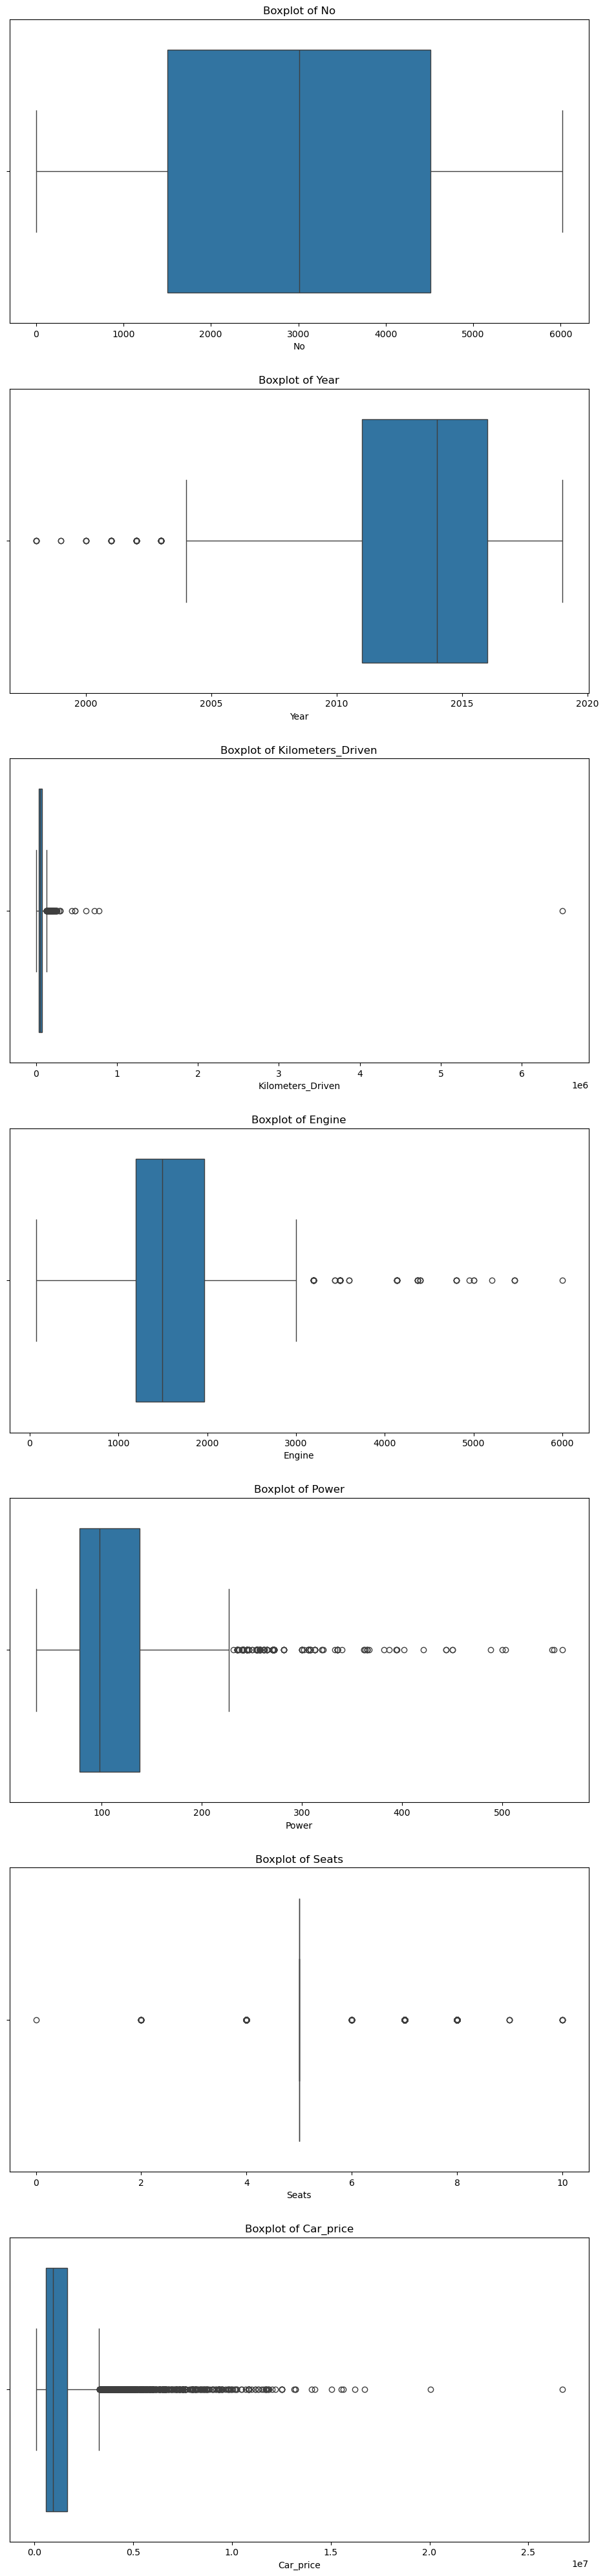

In [7]:
# Plotting box plots to visualize our outlier
numeric_columns = cleaned_df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, 6 * len(numeric_columns)))
for i, column in enumerate(numeric_columns):
    ax = axes[i] if len(numeric_columns) > 1 else axes  
    sns.boxplot(x=cleaned_df[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)
    

plt.tight_layout(pad=3.0) 
plt.subplots_adjust(top=0.95)

We seem to have outliers in the engine,year,kilometers driven and power we won't drop them because they are quite significant to our analysis and modelling because they represent real phenomena

Our data is clean

### 2: Feature engineering

By creating a column age we are ablle to observe the age of the vehicle by substracting the vehicle manufacture year by the current year 2024 and another column for showing the different brands of the vehicles 

In [8]:
# Creating the brand column
cleaned_df['Brand'] = cleaned_df['Model'].apply(lambda x: x.split()[0])
cleaned_df

,No,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Use,Engine,Power,Seats,Car_price,Brand
0,0,suzuki wagon r lxi cng,2010,72000,cng,manual,foreign,998.0,58.16,5,292250.0,suzuki
1,1,hyundai creta 1.6 crdi sx option,2015,41000,diesel,manual,foreign,1582.0,126.20,5,2087500.0,hyundai
2,2,honda jazz v,2011,46000,petrol,manual,foreign,1199.0,88.70,5,751500.0,honda
3,3,suzuki ertiga vdi,2012,87000,diesel,manual,foreign,1248.0,88.76,7,1002000.0,suzuki
4,4,audi a4 new 2.0 tdi multitronic,2013,40670,diesel,automatic,local,1968.0,140.80,5,2962580.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,suzuki swift vdi,2014,27365,diesel,manual,foreign,1248.0,74.00,5,793250.0,suzuki
6015,6015,hyundai xcent 1.1 crdi s,2015,100000,diesel,manual,foreign,1120.0,71.00,5,668000.0,hyundai
6016,6016,mahindra xylo d4 bsiv,2012,55000,diesel,manual,local,2498.0,112.00,8,484300.0,mahindra
6017,6017,suzuki wagon r vxi,2013,46000,petrol,manual,foreign,998.0,67.10,5,442550.0,suzuki


In [9]:
# Creating a new column age
cleaned_df['age'] = 2024 - cleaned_df['Year']
cleaned_df

,No,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Use,Engine,Power,Seats,Car_price,Brand,age
0,0,suzuki wagon r lxi cng,2010,72000,cng,manual,foreign,998.0,58.16,5,292250.0,suzuki,14
1,1,hyundai creta 1.6 crdi sx option,2015,41000,diesel,manual,foreign,1582.0,126.20,5,2087500.0,hyundai,9
2,2,honda jazz v,2011,46000,petrol,manual,foreign,1199.0,88.70,5,751500.0,honda,13
3,3,suzuki ertiga vdi,2012,87000,diesel,manual,foreign,1248.0,88.76,7,1002000.0,suzuki,12
4,4,audi a4 new 2.0 tdi multitronic,2013,40670,diesel,automatic,local,1968.0,140.80,5,2962580.0,audi,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,suzuki swift vdi,2014,27365,diesel,manual,foreign,1248.0,74.00,5,793250.0,suzuki,10
6015,6015,hyundai xcent 1.1 crdi s,2015,100000,diesel,manual,foreign,1120.0,71.00,5,668000.0,hyundai,9
6016,6016,mahindra xylo d4 bsiv,2012,55000,diesel,manual,local,2498.0,112.00,8,484300.0,mahindra,12
6017,6017,suzuki wagon r vxi,2013,46000,petrol,manual,foreign,998.0,67.10,5,442550.0,suzuki,11


### 3: EDA

In [10]:
class EDA(DataCleaner):
    def __init__(self, file_path):
        super().__init__(file_path)
        self.cleaned_data = cleaned_df

    def univariate_analysis(self):
        if self.cleaned_data is not None:
            numerical_columns = self.cleaned_data.select_dtypes(include=['float', 'int']).columns
            categorical_columns = self.cleaned_data.select_dtypes(include=['object']).columns
            numerical_columns = numerical_columns.drop(['No'], errors='ignore')
            categorical_columns = categorical_columns.drop(['Model','Brand'], errors='ignore')

            colors = ['maroon', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']

            for i, column in enumerate(numerical_columns):
                plt.figure(figsize=(10, 6))
                sns.histplot(self.cleaned_data[column], kde=True, color=colors[i % len(colors)])
                plt.title(f'Distribution of {column}')
                plt.xlabel(column)
                plt.ylabel('Frequency')
                plt.show()

            for i, column in enumerate(categorical_columns):
                plt.figure(figsize=(10, 6))
                sns.countplot(x=self.cleaned_data[column], order=self.cleaned_data[column].value_counts().index, palette=sns.color_palette("bright", len(self.cleaned_data[column].unique())))
                plt.title(f'Distribution of {column}')
                plt.xlabel(column)
                plt.ylabel('Count')
                plt.show()
        else:
            print("No data available for univariate analysis.")

    def bivarent_analysis(self, x_column, y_column, color='purple', x_label=None, y_label=None):
        if self.cleaned_data is not None:
            plt.figure(figsize=(10, 6))
            plt.scatter(self.cleaned_data[x_column], self.cleaned_data[y_column], color=color)
            
            title = f'Relationship Between {x_column} and {y_column}'
            plt.title(title)
            
            plt.xlabel(x_label if x_label else x_column)
            plt.ylabel(y_label if y_label else y_column)
            
            plt.grid(True)
            plt.show()
        else:
            print("No data available for plotting.")

    def correlation_matrix(self):
        numerical_data = self.cleaned_data.select_dtypes(include=['float', 'int'])
        plt.figure(figsize=(10, 6))
        sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Matrix')
        plt.show()

eda = EDA(file)


### Univalent Analysis

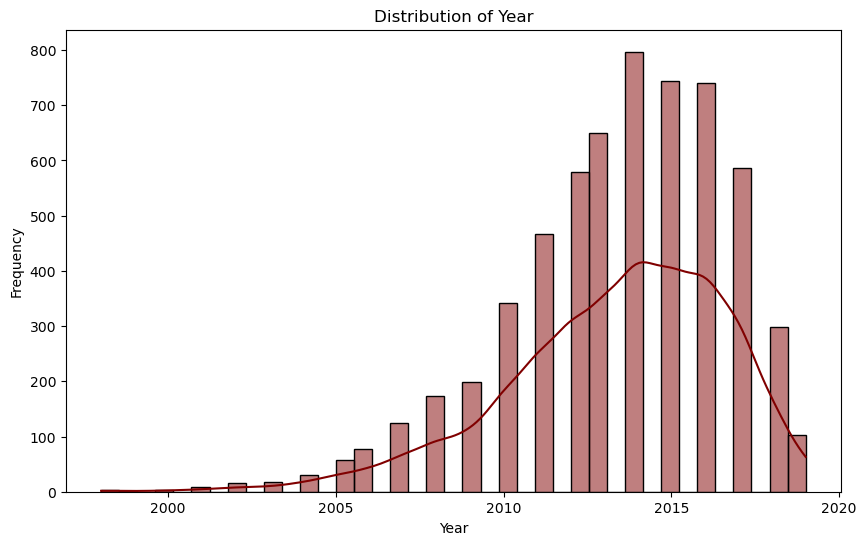

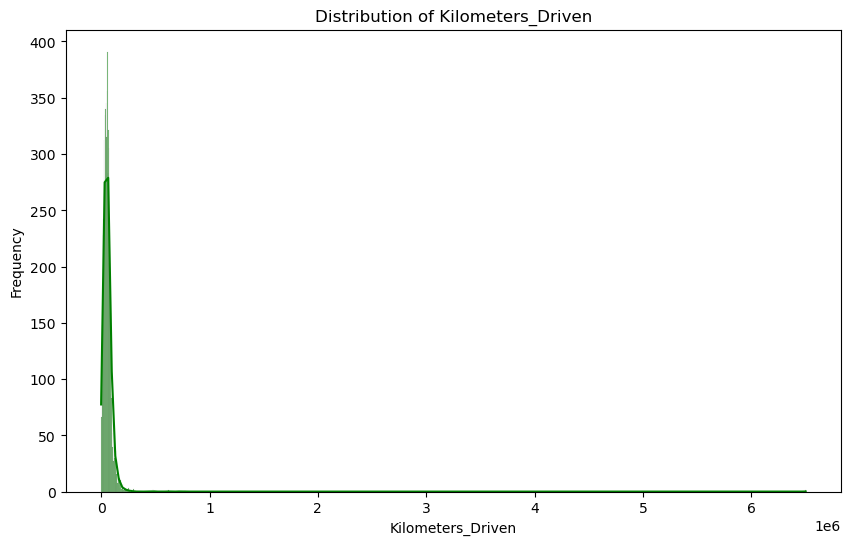

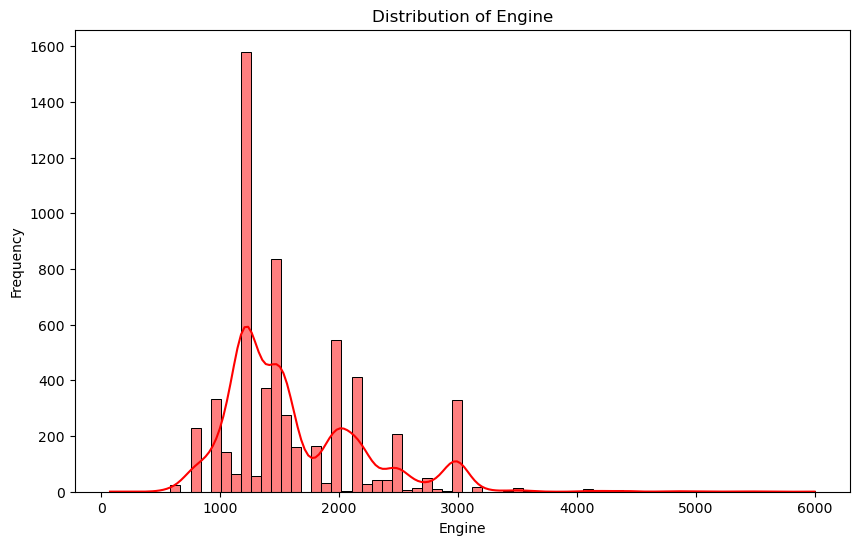

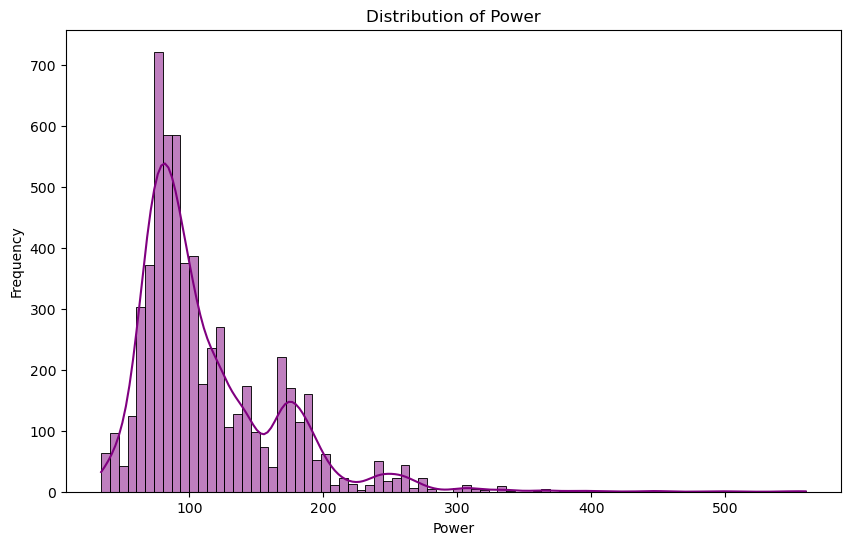

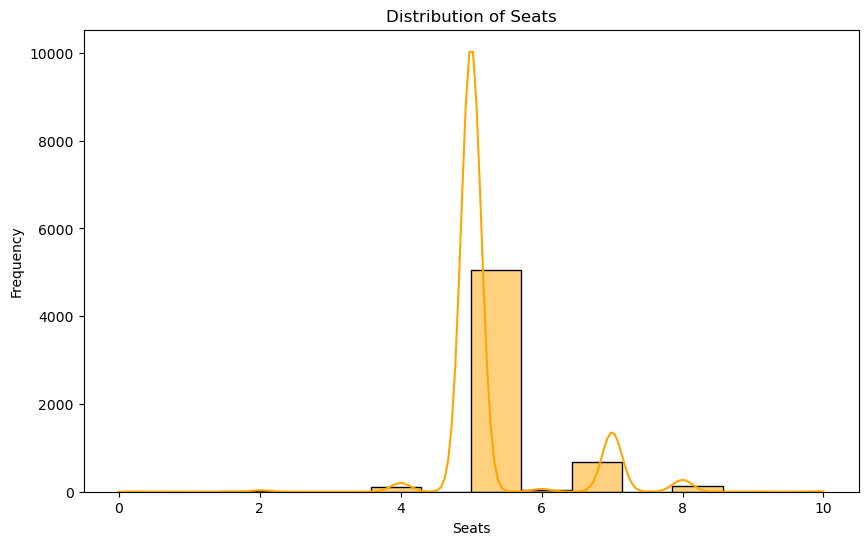

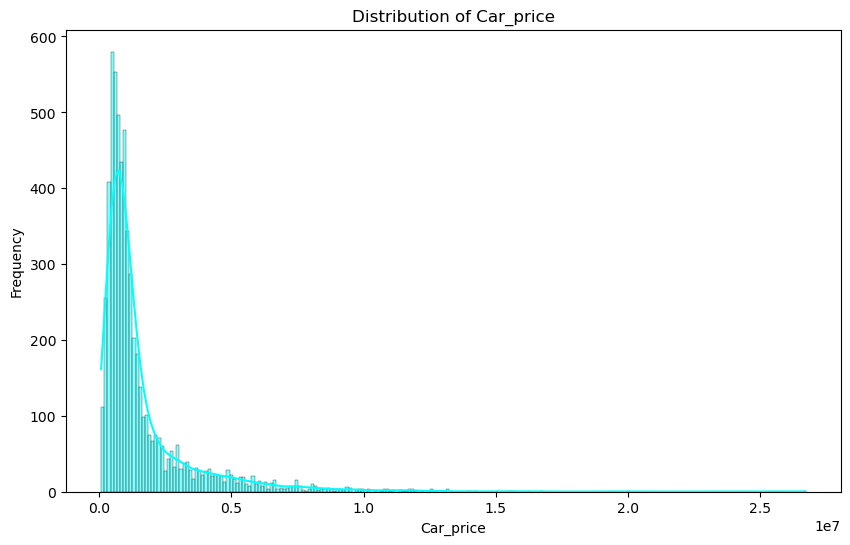

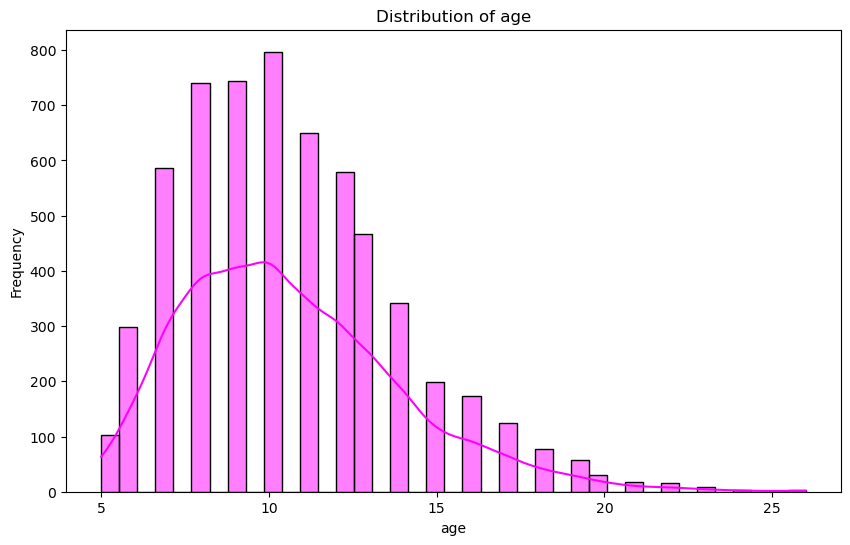

C:\Users\user\AppData\Local\Temp\ipykernel_1412\3168588092.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.cleaned_data[column], order=self.cleaned_data[column].value_counts().index, palette=sns.color_palette("bright", len(self.cleaned_data[column].unique())))


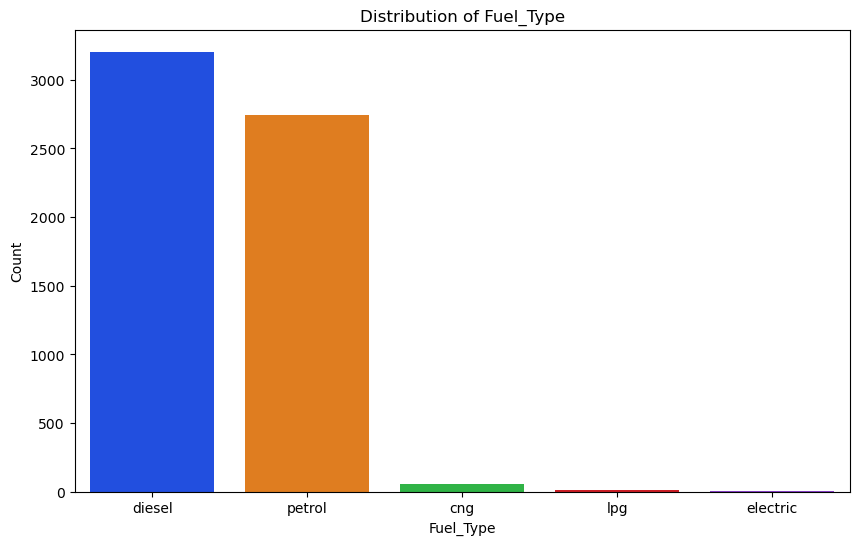

C:\Users\user\AppData\Local\Temp\ipykernel_1412\3168588092.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.cleaned_data[column], order=self.cleaned_data[column].value_counts().index, palette=sns.color_palette("bright", len(self.cleaned_data[column].unique())))


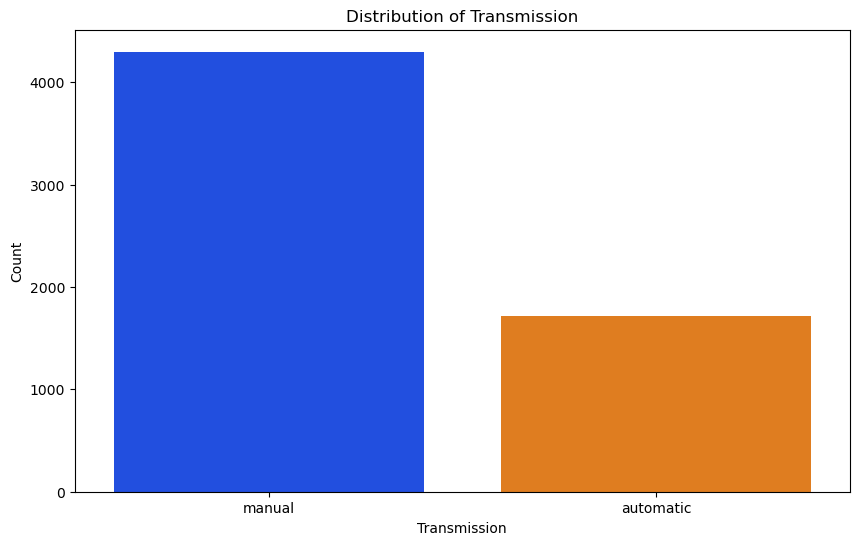

C:\Users\user\AppData\Local\Temp\ipykernel_1412\3168588092.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.cleaned_data[column], order=self.cleaned_data[column].value_counts().index, palette=sns.color_palette("bright", len(self.cleaned_data[column].unique())))


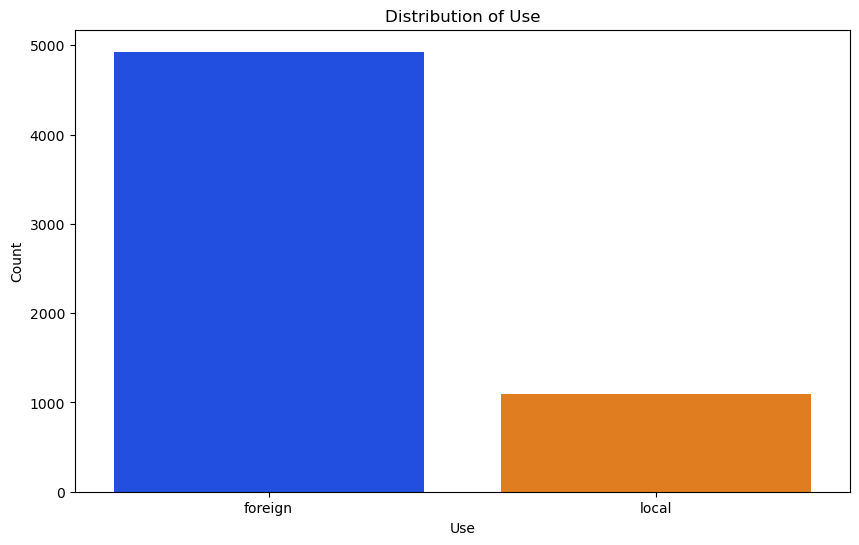

In [11]:
eda.univariate_analysis()

**OBSERVATIONS**

**Distribution of engine**

The engine capacity of most vehicles is between 1000 to 2000cc

**Distribution of power**

Most of the vehicle power is below 100 brake horsepower

**Distribution of car_price**

The price distribution is not normally distributed 

**Distribution of Transmission**

Most cars have a manual transmission

**Distribution of Fuel_type**

Disel power cars seem to be the majority

**Distribution of use**

Most of the vehicles are foreign used

**Distribution of age**

Most cars seem to range between 5 to 15 years old



C:\Users\user\AppData\Local\Temp\ipykernel_1412\3372173636.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_df[cleaned_df['Brand'].isin(top_brands)], x='Brand', order=top_brands, palette='Set2')


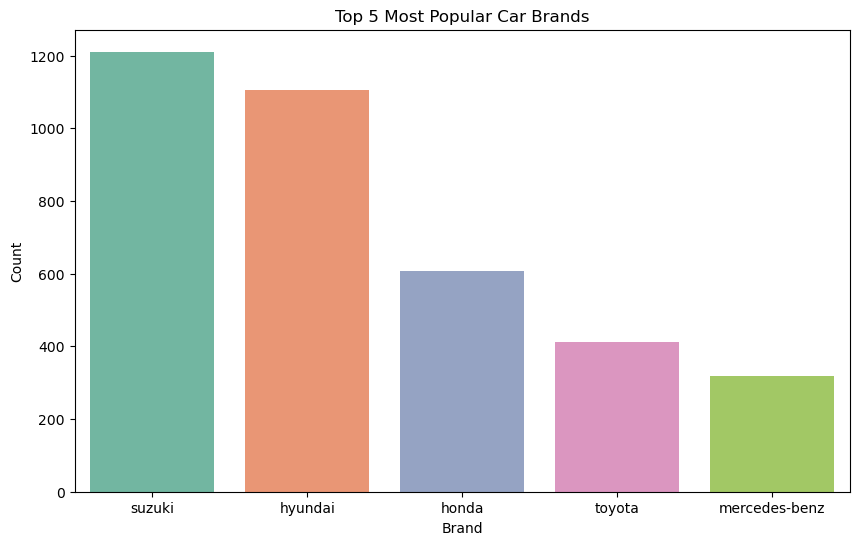

In [13]:
# Visualizing the top 5 popular brands of the vehicles
top_brands = cleaned_df['Brand'].value_counts().nlargest(5).index

# Plotting the count plot 
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_df[cleaned_df['Brand'].isin(top_brands)], x='Brand', order=top_brands, palette='Set2')

plt.title('Top 5 Most Popular Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

**OBSERVATIONS**

The Suzuki vehicle brand is the most common  vehicle in our dataset these could be attribute to its fuel efficiency due to their engine capacities and low prices

#### Bivalent Analysis

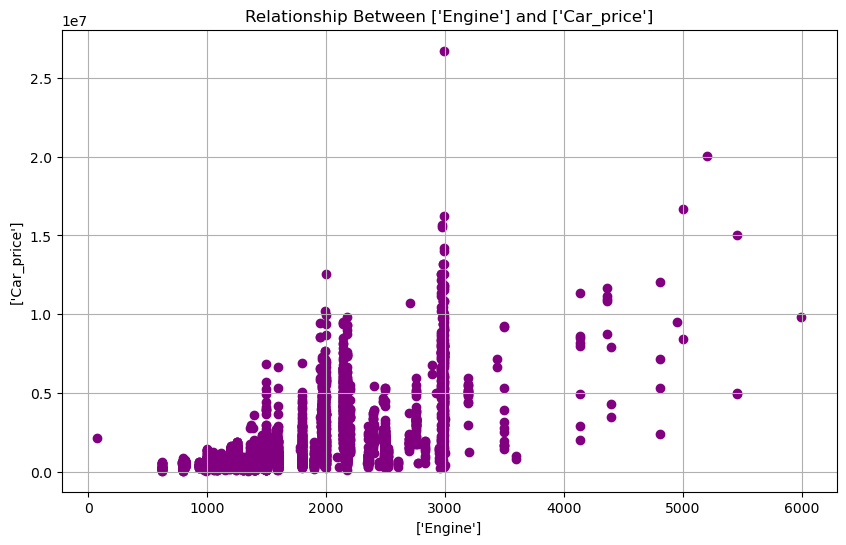

In [14]:
eda.bivarent_analysis(x_column=['Engine'], y_column=['Car_price'], color='purple')

**OBSERVATION**

Seems to be a postive relationship between the two

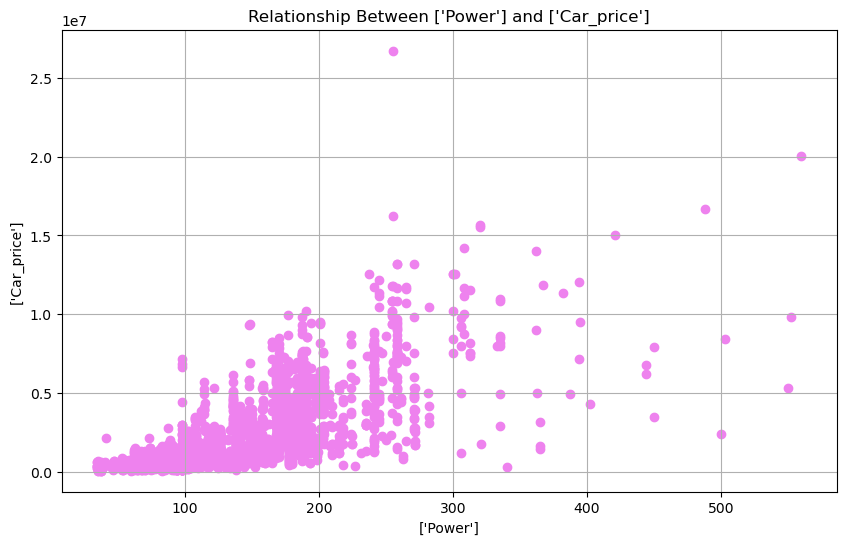

In [15]:
eda.bivarent_analysis(x_column=['Power'], y_column=['Car_price'], color='violet')

**OBSERVATION**

Seems to be a postive relationship between the two variables

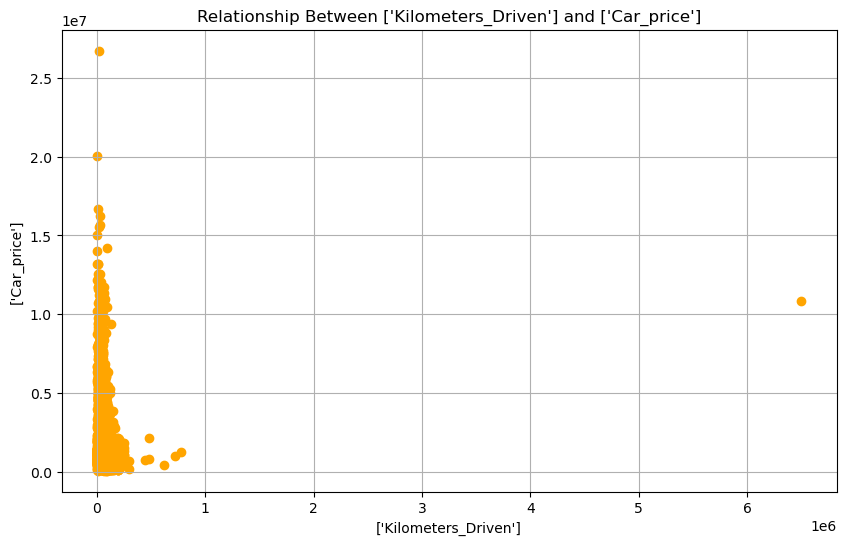

In [16]:
eda.bivarent_analysis(x_column=['Kilometers_Driven'], y_column=['Car_price'], color='orange')

**OBSERVATIONS**

No relationship between the two variables

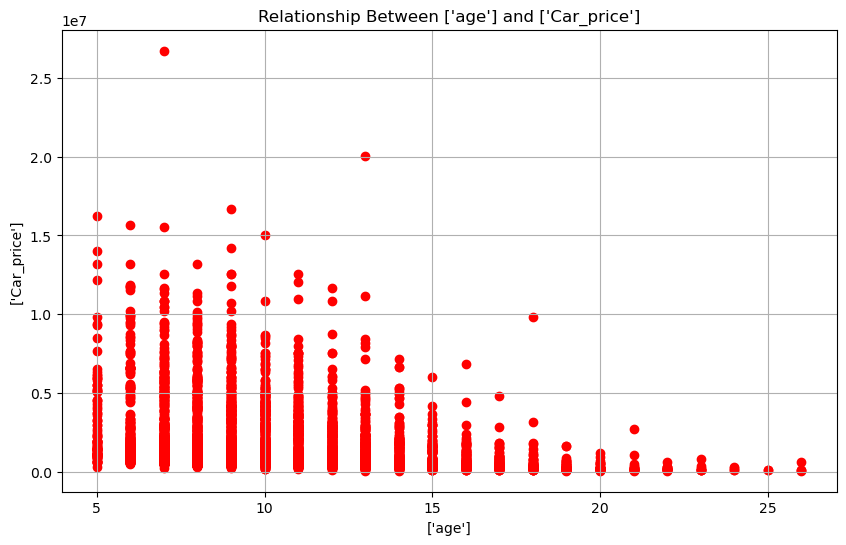

In [17]:
eda.bivarent_analysis(x_column=['age'], y_column=['Car_price'], color='red')

**OBSERVATIONS**

seems to be a  negative relationship between the two variables

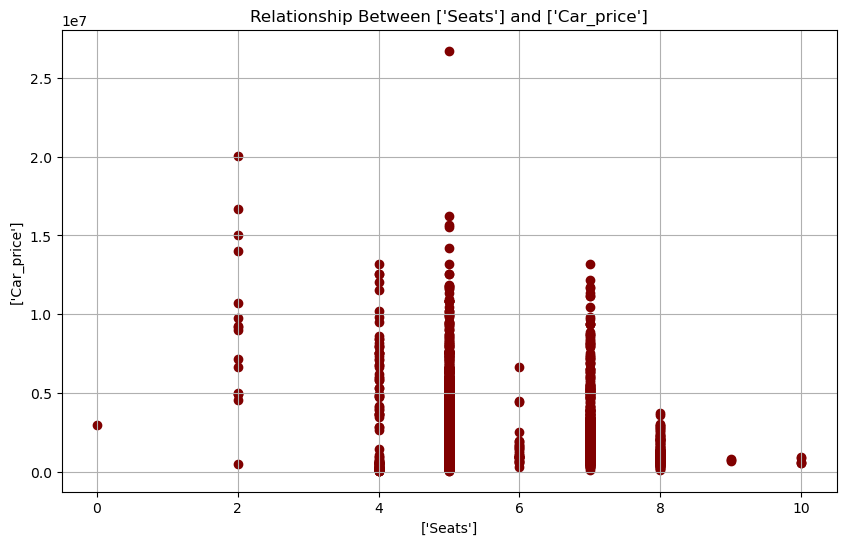

In [18]:
eda.bivarent_analysis(x_column=['Seats'], y_column=['Car_price'], color='maroon')

**OBSERVATIONS**

No direct relationship between the two variables

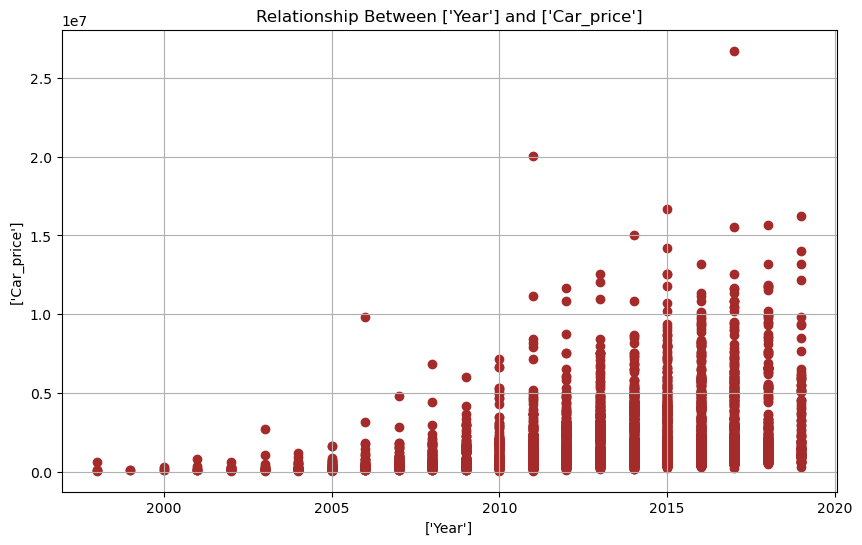

In [19]:
eda.bivarent_analysis(x_column=['Year'], y_column=['Car_price'], color='brown')

**OBSERVATIONS**

There seems to be a postive relationship between the two variables

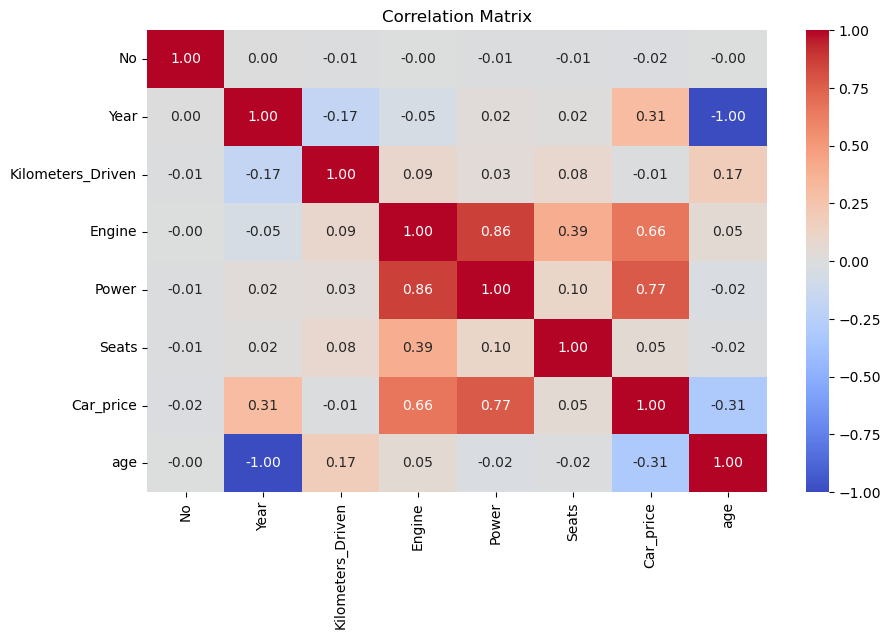

In [20]:
eda.correlation_matrix()

**OBSERVATIONS**

Engine size, power, and car price are all positively correlated with each other, forming a cluster of related variables.

The strongest relationship is between engine size and power (0.86), which is expected given their mechanical connection.

Car prices are influenced by both power and engine size, with power having a slightly stronger correlation to price.

High correlation between Engine and Power (0.86):This strong positive correlation indicates a high degree of multicollinearity between these two variables. hence we will use advanced regression techniques such as ridge regressioon and polynomial regression to address the issue

## Modelling

Data preprocessing steps followed and why

1. **Onehot Endcoding** of categorical variables to represent them numerically and preserve as much information about the variables as  possible 

2. **Stanndard Scaling** of  numerical variables, by scaling features with larger magnitudes  the features don't dominate the model hence improing  the model performance 

3. **Creating Pipeines** these aids in preenting data leakages

4. **Train test split** these aids us in splitting our data into 80% for train the model and 20% for testing our model prediction

Linear Regression - Cross-Validation R^2 Scores: [0.49888728 0.83208243 0.74540068 0.44993505 0.37450262]
Linear Regression - Cross-vaidation Mean R^2 Score: 0.5801616111866427
Linear Regression - MAE: 653141.0911210863, MSE: 1667372857846.4817, R^2: 0.514169621049094


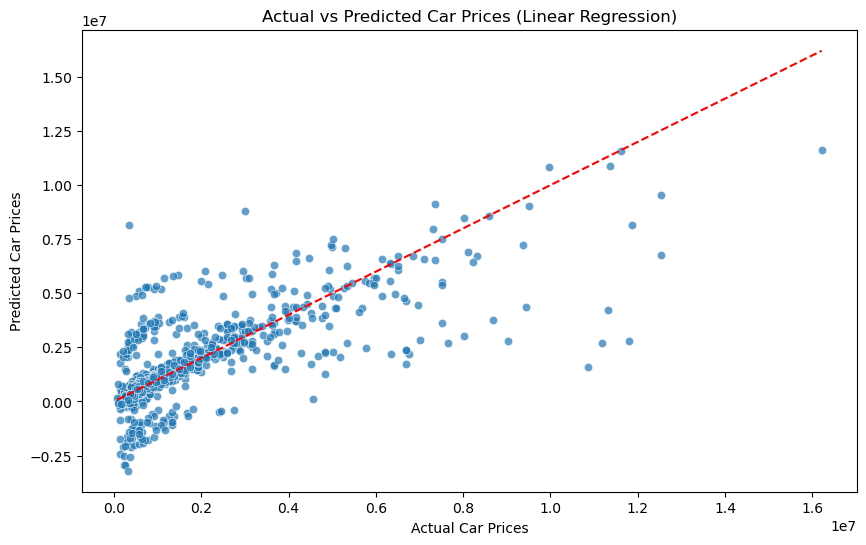

Ridge Regression - Cross-Validation R^2 Scores: [0.81289968 0.82027984 0.8229054  0.86549857 0.75612674]
Ridge Regression - Cross-vaidation Mean R^2 Score: 0.8155420471790114
Ridge Regression - MAE: 435767.8275125115, MSE: 903213350111.1564, R^2: 0.7368264200217524


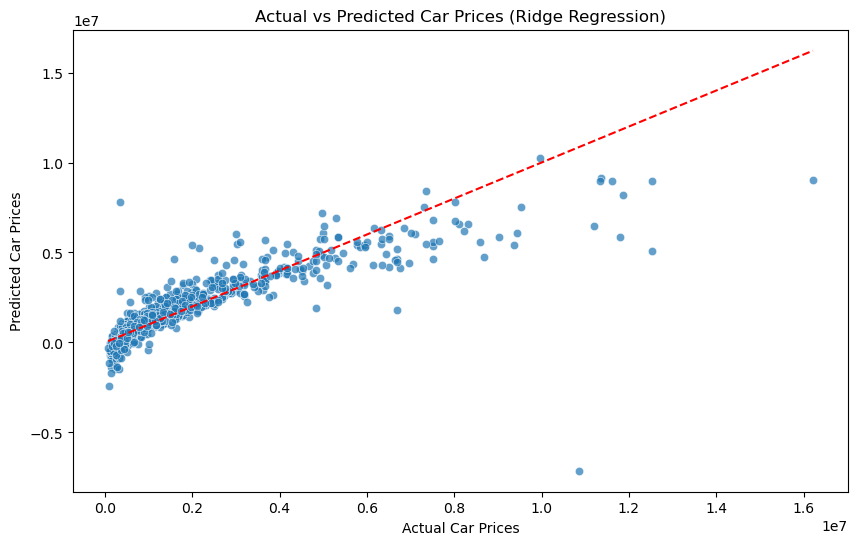

c:\Users\user\anaconda3\envs\new_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208781005759414.12, tolerance: 1356487793798.8208
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\user\anaconda3\envs\new_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 224916141588861.72, tolerance: 1407130511132.0688
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\user\anaconda3\envs\new_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183383936150385.56, tolerance: 1256704589181.5354
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\user\anaconda3\envs\new_env\lib\site-

Lasso Regression - Cross-Validation R^2 Scores: [0.77502638 0.82878083 0.80030169 0.82917943 0.73615664]
Lasso Regression - Cross-vaidation Mean R^2 Score: 0.7938889940452286


c:\Users\user\anaconda3\envs\new_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289096134152947.75, tolerance: 1687525907951.802
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso Regression - MAE: 408372.35580152494, MSE: 726061468445.9995, R^2: 0.7884440083711325


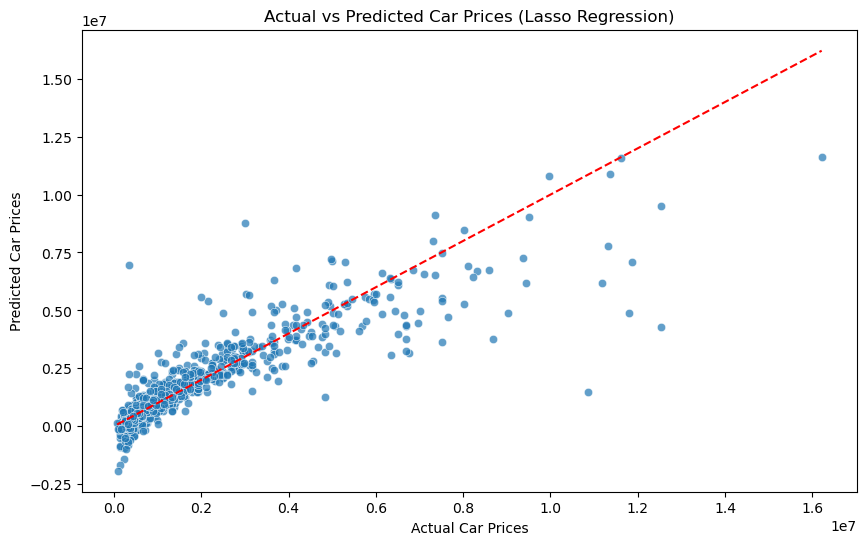

Elastic_net Regression - Cross-Validation R^2 Scores: [0.6777522  0.66492122 0.64934995 0.71894128 0.60511501]
Elastic_net Regression - Cross-vaidation Mean R^2 Score: 0.6632159293077331
Elastic_net Regression - MAE: 626174.6209329839, MSE: 1992540590683.4797, R^2: 0.4194239484639938


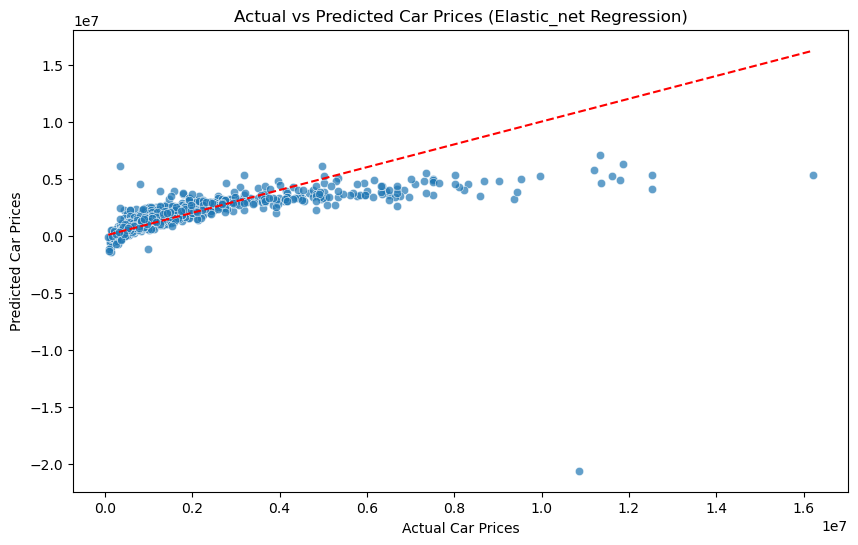

Random Regression - Cross-Validation R^2 Scores: [0.91016151 0.89617897 0.87982291 0.9364396  0.81265508]
Random Regression - Cross-vaidation Mean R^2 Score: 0.8870516152125706
Random Regression - MAE: 287017.7581978722, MSE: 467085871748.38055, R^2: 0.863902962671938


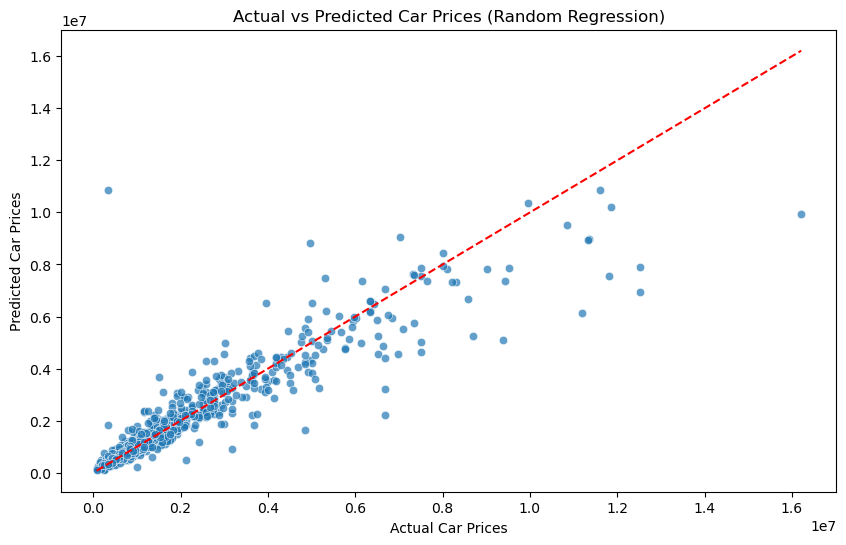

Knn Regression - Cross-Validation R^2 Scores: [0.89161795 0.89567849 0.82235545 0.87986102 0.80713744]
Knn Regression - Cross-vaidation Mean R^2 Score: 0.8593300706725449
Knn Regression - MAE: 345368.20598006644, MSE: 631763481116.226, R^2: 0.8159200625141163


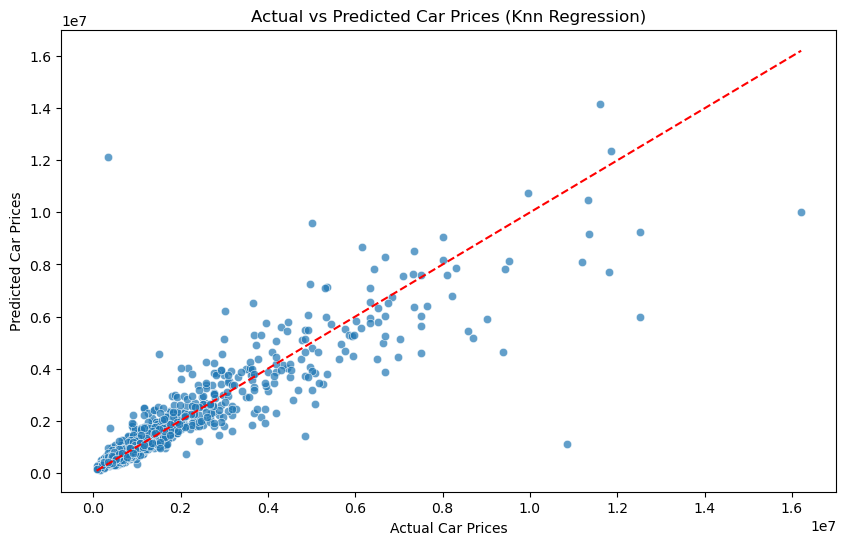

Xgboost Regression - Cross-Validation R^2 Scores: [0.91871123 0.9143013  0.87750399 0.91764454 0.79597591]
Xgboost Regression - Cross-vaidation Mean R^2 Score: 0.8848273930904845
Xgboost Regression - MAE: 296930.2172186462, MSE: 404348570846.4137, R^2: 0.8821830291418493


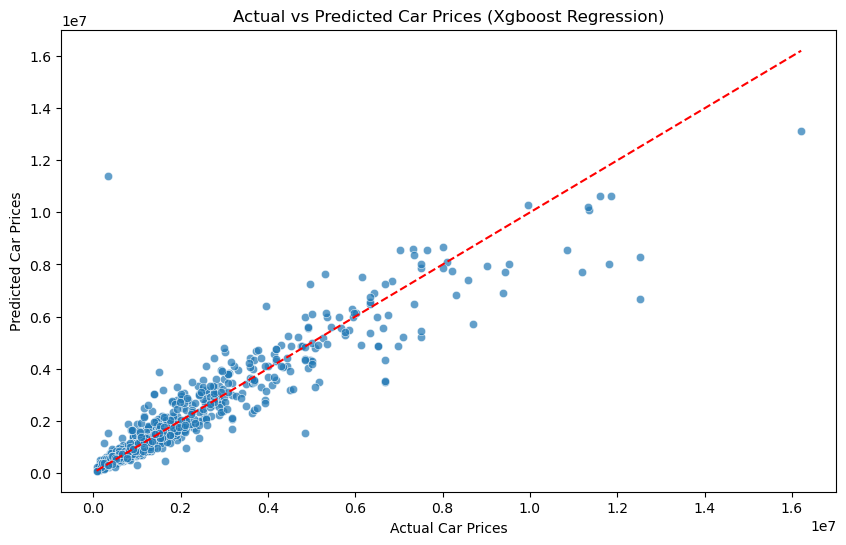

Catboost Regression - Cross-Validation R^2 Scores: [0.90837436 0.90386832 0.8816713  0.93621278 0.82495777]
Catboost Regression - Cross-vaidation Mean R^2 Score: 0.891016907302087
Catboost Regression - MAE: 311516.22402140085, MSE: 408217202268.3934, R^2: 0.8810558075603554


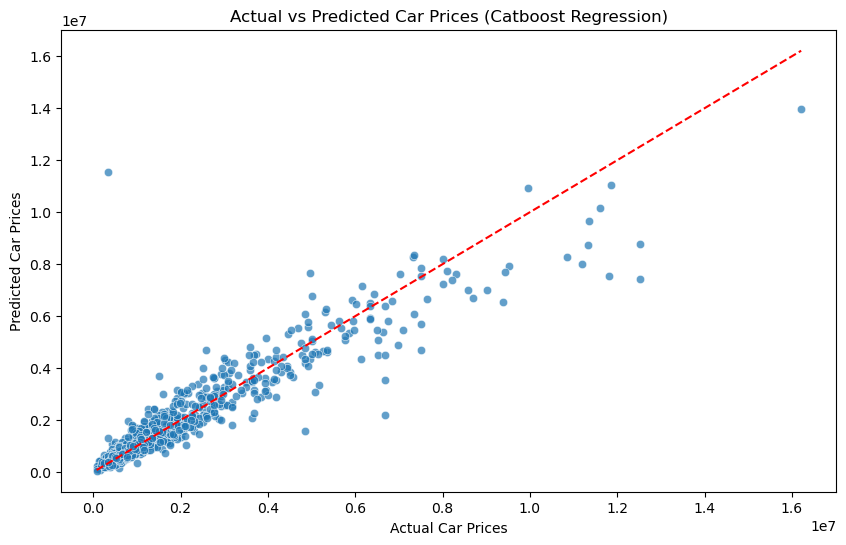

Svr Regression - Cross-Validation R^2 Scores: [-0.14254533 -0.10935253 -0.0983932  -0.12456927 -0.11849241]
Svr Regression - Cross-vaidation Mean R^2 Score: -0.11867054837954752
Svr Regression - MAE: 1001403.4765249923, MSE: 3813906817803.18, R^2: -0.11127621267022203


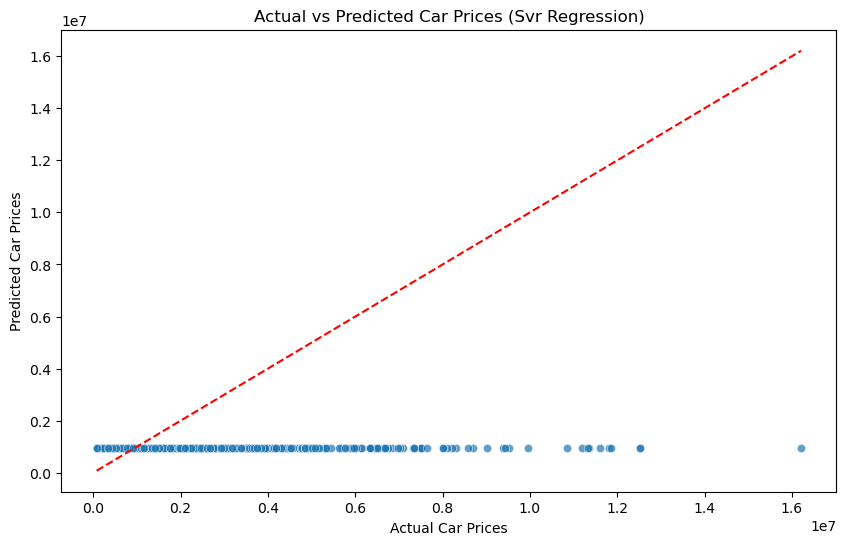

In [21]:
# Creating a class to help us model using different regression models utilizing pipelines
class ModelPipeline(DataCleaner):
    def __init__(self, file):
        super().__init__(file)
        self.cleaned_data = cleaned_df

    def create_pipeline(self):
        if self.cleaned_data is not None:
            # Define categorical columns to be encoded
            categorical_features = self.cleaned_data.select_dtypes(include=['object']).columns.tolist()
            numerical_features = self.cleaned_data.select_dtypes(include=['int', 'float']).columns.tolist()
            numerical_features.remove('Car_price')  # Correctly removing target variable from the list
            numerical_features.remove('No')        # Correctly removing Brand column from the list
            numerical_features.remove('age')
            categorical_features.remove('Brand')
            


            preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features),('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],remainder='passthrough') 
            # Define the various regression pipelines
            pipelines = {
                'linear': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())]),
                'ridge': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge())]),
                'lasso': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Lasso())]),
                'elastic_net': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', ElasticNet())]),
                'random': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor())]),
                'knn': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', KNeighborsRegressor())]),
                'xgboost': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', XGBRegressor())]),
                'catboost': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', CatBoostRegressor(verbose=0))]),
                'svr': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', SVR())])
                }

            # Splitting the data into train and test
            X = self.cleaned_data[numerical_features + categorical_features]
            y = self.cleaned_data['Car_price']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Storing the pipelines and data splits
            self.pipelines = pipelines
            self.X_train = X_train
            self.X_test = X_test
            self.y_train = y_train
            self.y_test = y_test

            return pipelines
    # Function to perform cross validation
    def cross_validate_model(self, model_name):
        model_name = model_name.lower()
        if model_name not in self.pipelines:
            print(f"Model name '{model_name}' not found")
            return

        pipeline = self.pipelines[model_name]

        # Performing cross-validation on our models
        cv_scores = cross_val_score(pipeline, self.X_train, self.y_train, cv=5, scoring='r2')
        print(f'{model_name.capitalize()} Regression - Cross-Validation R^2 Scores: {cv_scores}')
        print(f'{model_name.capitalize()} Regression - Cross-vaidation Mean R^2 Score: {cv_scores.mean()}')

    # Visualizing our model line of best fir
    def visualize_model(self, model_name):
        model_name = model_name.lower()
        if model_name not in self.pipelines:
            print(f"Model name '{model_name}' not found")
            return

        pipeline = self.pipelines[model_name]

        # Fitting the models
        pipeline.fit(self.X_train, self.y_train)

        # Predicting on the test sets
        y_pred = pipeline.predict(self.X_test)

        # Evaluating the models
        mae = mean_absolute_error(self.y_test, y_pred)
        mse = mean_squared_error(self.y_test, y_pred)
        r2 = r2_score(self.y_test, y_pred)
        print(f'{model_name.capitalize()} Regression - MAE: {mae}, MSE: {mse}, R^2: {r2}')

        # Visualization of Predicted vs Actual Prices of our models
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=self.y_test, y=y_pred, alpha=0.7)
        plt.plot([self.y_test.min(), self.y_test.max()], [self.y_test.min(), self.y_test.max()], color='red', linestyle='--')
        plt.xlabel('Actual Car Prices')
        plt.ylabel('Predicted Car Prices')
        plt.title(f'Actual vs Predicted Car Prices ({model_name.capitalize()} Regression)')
        plt.show()
# Creating an instance of theclass and calling the create_pipeline method
model_pipeline = ModelPipeline(file)
pipelines = model_pipeline.create_pipeline()

# Cross-validating and visualize the models
if pipelines:
    for model_name in pipelines.keys():
        model_pipeline.cross_validate_model(model_name)
        model_pipeline.visualize_model(model_name)
           
   



Seems our best performing models is the xgboost,catboost regressor,randomforest regressor and knn regressor respectively hence we will  tune the randomforest regression model using gridsearch to achieve the best performance since its the best performing model interms of Mean absolute error

The support vector regression model is the worst performing model 

In [22]:
# isolating our randomforest regressor model

categorical_features = cleaned_df.select_dtypes(include=['object']).columns.tolist()
numerical_features = cleaned_df.select_dtypes(include=['int', 'float']).columns.tolist()
numerical_features.remove('Car_price')  # Correctly removing target variable from the list
numerical_features.remove('No')
numerical_features.remove('age')
categorical_features.remove('Brand')


preprocessor = ColumnTransformer(transformers=[ ('num', StandardScaler(), numerical_features),('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],remainder='passthrough') 

random_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', RandomForestRegressor())])

X = cleaned_df[numerical_features + categorical_features]
y = cleaned_df['Car_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_pipeline.fit(X_train, y_train)
y_pred = random_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Random Forest Regression - MAE: {mae}, MSE: {mse}, R^2: {r2}')




Random Forest Regression - MAE: 285297.5060524442, MSE: 462621121815.5656, R^2: 0.8652038781459863


In [23]:


# Defining the parameter grid
param_grid = {
    'regressor__n_estimators': [50, 100, 150],       # Number of trees in the forest
    'regressor__max_features': ['log2', 'sqrt'],      # Number of features to consider for the best split
    'regressor__max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'regressor__min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'regressor__min_samples_leaf': [1, 2, 4],         # Minimum number of sample
}

# Creating the GridSearchCV 
grid_search = GridSearchCV(
    estimator=random_pipeline,
    param_grid=param_grid,
    cv=5,  
    scoring='neg_mean_squared_error',  
    n_jobs=-1,  
    verbose=2  
)

# Fittinf the GridSearchCV on the train data
grid_search.fit(X_train, y_train)

#finding the best parameters
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# fitting and testing the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Random Forest Regression with Grid Search - MAE: {mae}, MSE: {mse}, R^2: {r2}')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 150}
Best Score: 469755698381.6852
Random Forest Regression with Grid Search - MAE: 302800.7912658862, MSE: 458068900019.6986, R^2: 0.8665302807138024


In [24]:
 #Saving randomforest regressor model as a pickle file for deployment
with open('Random_forest_regressor_model2.pkl', 'wb') as file:
    pickle.dump(random_pipeline, file)

print("Model saved successfully.")

Model saved successfully.


## Evaluation

Metrics used in evaluating the models and why:

**R squared** tells us  how well the model captures the overall trends in the data

**Mean absolure error** tells us the typical magnitude of the model's prediction errors and it is not affected by outliers unlike **mean square error**


Models used and their performance:

|MODEL	           |R SQUARED	    |MAE              |	
|------------------|----------------|-----------------|
|linear regression |	0.58        |  653141.09      |
|Ridge regression  |	0.73        |  435767.83	  |
|Lasso regression  |    0.78        |  408372.36	  |	     
|Elastic net	   |    0.41        |  626174.62	  |	    
|Random Forest     |	0.86	    |  287296.62	  |     
| KNN	regressor  |	0.81	    |  345368.21      |	     
|XGBOOST           |    0.88        |  296930.22      |         
|Catboost          |    0.88        |  311516.22      |         
|Svr               |   -0.11        |  1001403.48     |              
|Tuned RandomForest|    0.86        |  307417.55      |


Best Performing Model and model of choice for deployment:

**RandomForest Regressor** Why;

The Random Forest model has the highest cross-validation mean R^2 score of 0.88, suggesting its superior performance across various data subsets.

Random Forest has the highest test set R^2 score of 0.86, indicating great predictive ability on unseen data.

Random Forest has the lowest MAE (Mean Absolute Error) at 287296.22, indicating the smallest differences between predicted and actual values.

Random Forest's cross-validation R^2 values range from 0.81 to 0.91, indicating consistent performance across data splits.








## Conclusions

## Recommedations